In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x +5
f(3.0)

20.0

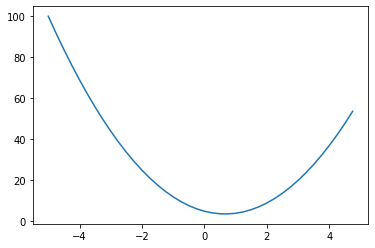

In [3]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [4]:
h = 0.00000001
x = -3.0
(f(x+h) - f(x))/h # Definition of a gradient; for a very small val of h i.e h -> 0, derivative = (f(x+h) - f(x))/h

-22.00000039920269

In [5]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [6]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c

a+=h
d2 = a*b + c

# Derivative w.r.t a is the derivative when the val of a is bumped by a h amount
print('d1: ', d1)
print('d2: ', d2)
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  3.999699999999999
slope:  -3.000000000010772


In [32]:
class Value:
    def __init__(self,data,_children=(),_op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')
        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other), '+')
        return out
    
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/ (math.exp(2*n) + 1)
        out = Value(t,(self,),'tanh')
        return out

    
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')
e = a*b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0,label='f')
L = f * d; L.label = 'L'
L

Value(data=-8.0)

In [14]:
# !pip install graphviz

In [17]:
# from graphviz import Digraph

# def trace(root):
#     """
#     Recursively build a set of all nodes and edges 
#     that lead into 'root'.
#     """
#     nodes, edges = set(), set()
    
#     def build(v):
#         if v not in nodes:
#             nodes.add(v)
#             for child in v._prev:
#                 edges.add((child, v))
#                 build(child)
                
#     build(root)
#     return nodes, edges

# def draw_dot(root):
#     """
#     Create a Graphviz Digraph from the traced nodes/edges.
#     """
#     dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
#     nodes, edges = trace(root)

#     for n in nodes:
#         uid = str(id(n))
        
#         # Node label will show the variable’s own label, data, and op
#         node_label = f"{{ {n.label} }} | data={n.data:.4f} | op={n._op} | grad={n.grad:.4f}"
        
#         dot.node(name=uid, label=node_label, shape='record')
        
#     for n1, n2 in edges:
#         dot.edge(str(id(n1)), str(id(n2)))
    
#     return dot

In [19]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

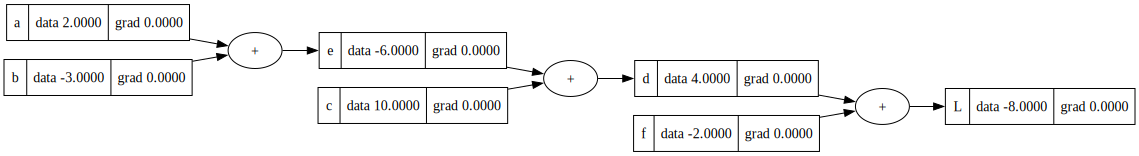

In [26]:
draw_dot(L)

In [23]:
a.data += 0.01 + a.grad
b.data += 0.01 + b.grad
c.data += 0.01 + c.grad
f.data += 0.01 + f.grad

e = a*b
d = e + c
L = f * d

print(L.data)

-7.920792


In [27]:
def example_1():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data
  
  print((L2 - L1)/h)
  
example_1()

-3.9999999999995595


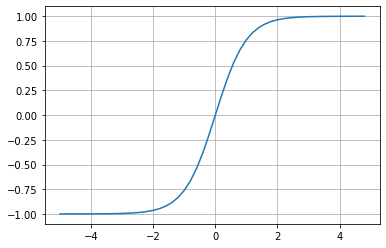

In [28]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)));plt.grid()

In [39]:
# Simple NN

# 1 Inputs

x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# 2 Weights

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#  3 bias

b = Value(6.88137, label='b')

#  Hidden layer
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1w1_x2w2'

# Output
n = x1w1_x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o' # tanh activation for final output

# tanh = (e^2x - 1)/(e^2x + 1)



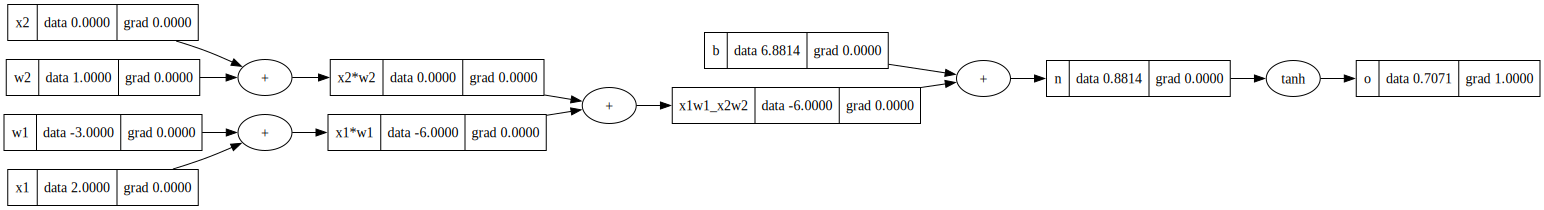

In [42]:
draw_dot(o)

In [41]:
o.grad = 1